# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1303 Беззубов Даниил. Вариант №2.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов

## Основные теоретические положения

Рассмотрим методы вычисления мономов за минимальное число операций, а также приведем некоторые оценки количества операций для их вычисления.

Введем следующие понятия:
$\lambda(n) = \lfloor \log_2(n) \rfloor$ - уменьшенная на 1 длина бинарной записи $n$\
$\nu(n)$ - вес Хэмминга для бинарной записи $n$ (число единиц в бинарной записи)

### Бинарный метод $SX$

Алгоритм для возведения в степень $n$ бинарным методом $SX$:

1. Представим $n$ в бинарном виде $n = (a_m, a_{m-1}, \dots, a_1)_2$, при этом $a_m = 1$
2. Отбрасываем старший бит
3. Преобразуем запись $n$: 
$a_i = 1 \Rightarrow a_i = SX\\
a_i = 0 \Rightarrow a_i = S$ 
4. Выполняем вычисление, начиная с $x$. Далее, проходя по полученной записи:
$a_i = S \Rightarrow x \to x^2\\
a_i = X \Rightarrow x = x\cdot x$

Число операций для метода $SX$:
$\lambda(n)+\nu(n) - 1$

### Бинарный метод возведения справа налево

Алгоритм возведения в степень $n$ справа налево:

1. На нулевой итерации положим $N = n, Y = 1, X = x$
2. Если $N$ нечетно - переходим к п.3, иначе п.4
3. Присваиваем $N = \lfloor N/2 \rfloor, Z = Z\cdot Z$, переходим к п.2
4. Присваиваем $N = \lfloor N/2 \rfloor, Y = Z\cdot Y$
5. Если $N = 0$, возвращаем $Y$ и завершаем выполнение, иначе $Z = Z\cdot Z$ и переходим к п.2

Число операций для бинарного метода возведения в степень справа налево:
$\lambda(n)+\nu(n)$

### Метод множителей

Алгоритм возведения в степень методом множителей:

1. Представим $n$ в виде $n = p\cdot q$, где $p$ - наименьший простой множитель $n$, а $q > 1$. Таким образом, $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$
2. Если $n$ - простое, то вычислим $x^{n-1}$ и умножим его на $x$
3. При $n = 1$ - получим $x^n$

Следуя этим шагам можно раскладывать (тем самым вычисляя) $p$ на любом шаге, и в конце концов получить $x^n$

### Дерево степеней

Алгоритм построения дерева степеней до $k$-го уровня:

1. На нулевом уровне в дереве расположен узел - 1. Это корень дерева
2. $k+1$-й уровень строим таким образом: берется каждый узел $i$ на $k$-ом уровне слева направо и к нему присоединяются узлы $i+a_0, i+a_1, \dots, i+a_{k-1}$
3. При этом, если узел уже появлялся - он не добавляется

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы

## Бинарный метод SX
Реализуем функцию $SX\_notation(n)$, которая на вход принимает число, являющееся показателем степени, в которую необходимо возвести число. Данное значение преобразуется в бинарный вид, при этом обрезается старший бит. Затем по данной записи строится строка, состаящая из "S" и "X", где "S" будет означать возведение в квадрат, а "X" - умножение на основание степени. В данном алгоритме все единицы в записи будут заменяться на "SX", а нули на "X". По полученной строке построим возведение в степень с помощью метода $SX\_method(n)$

In [13]:
## Код для выполнения пункта работы
## Не забывайте добавлять комментарии для удобства проверки преподавателем
def SX_notation(n):
    bin_notation = str(bin(n))[3:]
    bin_notation = bin_notation.replace('1', 'SX').replace('0', 'S')
    print(bin_notation)
    return bin_notation

def SX_method(n):
    notation = SX_notation(n)
    x, result = var(' x x ')
    for i,elem in enumerate(notation):
        if elem is 'S':
            result^=2
        else:
            result*=x
        print(f'(iteration №{i+1}: {result})', end=' ')
    print()

Протестируем полученную функцию на $n = 3, 15, 16$

In [14]:
testing_set = [3, 15, 16]
for elem in testing_set:
    SX_method(elem)

SX
(iteration №1: x^2) (iteration №2: x^3) 
SXSXSX
(iteration №1: x^2) (iteration №2: x^3) (iteration №3: x^6) (iteration №4: x^7) (iteration №5: x^14) (iteration №6: x^15) 
SSSS
(iteration №1: x^2) (iteration №2: x^4) (iteration №3: x^8) (iteration №4: x^16) 


Проверим корректность реализованного алгоритма, сравнив полученное число операций с теоретическими:

$n = 3 \Rightarrow \lambda(3) = \lfloor \log_{2}(3) \rfloor = 1; \nu(3) = 2; \lambda(3) + \nu(3) - 1 = 2 \to верно$
$n = 15 \Rightarrow \lambda(15) = \lfloor \log_{2}(15) \rfloor = 3; \nu(15) = 4; \lambda(15) + \nu(15) - 1 = 6 \to верно$
$n = 16 \Rightarrow \lambda(16) = \lfloor \log_{2}(16) \rfloor = 4; \nu(16) = 1; \lambda(16) + \nu(16) - 1 = 4 \to верно$

Таким образом, алгоритм для данных $n$ работает корректно.

### Выводы
Реализован бинарный метод $SX$. Построенный алгоритм был проверен на 3 различных значениях $n$, полученное количество операций совпадает с теоретической оценкой для данного метода. Для подсчета кол-ва операций воспользуемся следующей формулой: $\lambda(n) + \nu(n) - 1 $, при этом, с помощью данной оценки можно узнать общее число итераций функции, т.к. за одну итерацию выполняется одна операция умножения.

## Бинарный метод возведения в степень справа налево

Реализуем функцию $R\_to\_L(n)$, на вход которой передается показатель степени, в которую требуется возвести моном. В данной функции инициализируем переменные $N, y, z$, необходимые для работы данного алгоритма. Так же будем выводить промежуточные значения данных переменных и моном.

In [15]:
def R_to_L(n, show_data = False):
    N = n
    y = 1
    z = var(' x ')
    iter = 0
    if show_data: print(f'iteration №{iter}: N={N}, y={y}, z={z}')
    while True:
        if N%2:
            N = floor(N/2)
            y*=z
            if N == 0:
                iter+=1
                break
            z*=z
        else:
            N = floor(N/2)
            z*=z
        iter+=1
        if show_data: print(f'iteration №{iter}: N={N}, y={y}, z={z}')
    if show_data: print(f'iteration №{iter}: N={N}, y={y}, z={z}')
    return y

Протестируем полученную функцию на $n = 3, 15, 16$

In [16]:
for elem in testing_set:
    print(elem)
    R_to_L(elem, True)
    print()

3
iteration №0: N=3, y=1, z=x
iteration №1: N=1, y=x, z=x^2
iteration №2: N=0, y=x^3, z=x^2

15
iteration №0: N=15, y=1, z=x
iteration №1: N=7, y=x, z=x^2
iteration №2: N=3, y=x^3, z=x^4
iteration №3: N=1, y=x^7, z=x^8
iteration №4: N=0, y=x^15, z=x^8

16
iteration №0: N=16, y=1, z=x
iteration №1: N=8, y=1, z=x^2
iteration №2: N=4, y=1, z=x^4
iteration №3: N=2, y=1, z=x^8
iteration №4: N=1, y=1, z=x^16
iteration №5: N=0, y=x^16, z=x^16



Выведем результаты работы алгоритма в виде таблиц

Для $n = 3$

| № итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 0          | 3          | 1          | $x$        |
| 1          | 1          | $x$        | $x^2$      |
| 2          | 0          | $x^3$      | $x^2$      |

Для $n = 15$

| № итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 0          | 15         | 1          | $x$        |
| 1          | 7          | $x$        | $x^2$      |
| 2          | 3          | $x^3$      | $x^4$      |
| 3          | 1          | $x^7$      | $x^8$      |
| 4          | 0          | $x^{15}$   | $x^8$      |

Для $n = 16$

| № итерации | Значение N | Значение Y | Значение Z |
|------------|------------|------------|------------|
| 0          | 16         | 1          | $x$        |
| 1          | 8          | 1          | $x^2$      |
| 2          | 4          | 1          | $x^4$      |
| 3          | 2          | 1          | $x^8$      |
| 4          | 1          | 1          | $x^{16}$   |
| 5          | 0          | $x^{16}$   | $x^{16}$   |

Подсчитаем кол-во операций умножения при выполнении данного алгоритма (оно отличается от числа операций).

Для $n = 3$ число операций - 3.\
Для $n = 15$ число операций - 7.\
Для $n = 16$ число операций - 5.

Проверим корректность реализованного алгоритма, сравнив полученное число операций с теоретическими:

$n = 3 \Rightarrow \lambda(3) = \lfloor \log_{2}(3) \rfloor = 1; \nu(3) = 2; \lambda(3) + \nu(3) = 3 \to верно$\
$n = 15 \Rightarrow \lambda(15) = \lfloor \log_{2}(15) \rfloor = 3; \nu(15) = 4; \lambda(15) + \nu(15) = 7 \to верно$\
$n = 16 \Rightarrow \lambda(16) = \lfloor \log_{2}(16) \rfloor = 4; \nu(16) = 1; \lambda(16) + \nu(16) = 5 \to верно$

Таким образом, алгоритм для данных $n$ работает корректно.

### Выводы
Реализован бинарный метод возведения в степень справа налево. Построенный алгоритм был проверен на 3 различных значениях $n$, полученное количество операций совпадает с теоретической оценкой для данного метода. Данный метод требует на одну операцию умножения больше, чем метод "SX", более того, он является более сложным для реализации. При этом подсчитать кол-во операций возможно следующим образом: $\lambda(n) + \nu(n)$.

В общем случае значение $z$ после завершения алгоритма равно $x^{2^{k-2}}$, где $k$  - кол-во итераций алгоритма.

## Сравнение метода "SX" и метода возведения в степень справа налево

Метод "SX" - кол-во итераций совпадает с кол-вом операций, оценивается как $\lambda(n) + \nu(n) - 1$\
Метод возведения в степень справа налево - кол-во итераций в общем случае оценивается как $\lfloor \log_{2}(n) \rfloor + 2$\
Таким образом, учитывая, что "SX" требует меньшее число как операций, так и итераций - он является более выгодным.

## Метод множителей

Применим метод множителей к приведенным ранее $n$

**n = 3**

$x^3 = x^2\cdot x\\
x^2 = x \cdot x$

Всего 2 операции 

**n = 15**

$x^{15} = (x^3)^5\\
y = x^3 = x \cdot x^2 - \text{(1 операция)}\\
x^2 \to x, x^2 - \text{(1 операция)}\\
y^5 = y \cdot y^4 - \text{(1 операция)}\\
y^4 \to y, y^2, (y^2)^2 - \text{(2 операции)}$

Всего 5 операций

**n = 16**

$x^{16} = (x^2)^8\\
y = x^2 = x \cdot x - \text{(1 операция)}\\
y^8 \to y, y^2, (y^2)^2, ((y^2)^2)^2 - \text{(3 операции)}$

Всего 4 операции

Таким образом, для приведенных ранее $n$ метод множитель дает количество операций меньше или равное количеству операции при использовании метода "SX". Приведем пример такого $n$, при котором метод множителей будет работать хуже:

**n = 33 (минимальное n, при котором метод множителей хуже бинарного метода**

$x^{33} = (x^3)^{11}\\
y = x^3 \to x, x^2, x^3 - \text{(2 операции)}\\
y^{11} = y \cdot y^{10} - \text{(1 операция)}\\
y^{10} = (y^2)^5\\
y^2 = y \cdot y - \text{(1 операция)}\\
(y^2)^5 = y^2 \cdot (y^2)^4 - \text{(1 операция)}\\
(y^2)^4 = ((y^2)^2)^2 \to y^2, (y^2)^2, ((y^2)^2)^2 - \text{(2 операции)}$

Итого, 7 операций, бинарный метод для данного $n$ выполняет 6 операций.

### Выводы
Рассмотрен метод множителей для нескольких $n$. Главное преимущество данного метода - в среднем он превосходит бинарный метод по количеству операций, но существуют значения, на которых бинарный метод будет выгоднее (приведенный выше $n = 33$).

## Дерево степеней

Реализуем методы для построения дерева степеней, а так же для поиска пути от корня дерева до заданного числа $n$. Дерево будем хранить в виде словаря, где ключами будут являться узлы, то есть степени, а значениями - списки "родителей", иными словами, узлы, которые необходимо пройти от корня до конкретного узла.

In [17]:
def build_tree(n):
    tree = {1:[1]}
    vertexes = [1]
    for level in range(n):
        next_level_vertexes = []
        for parent in vertexes:
            for leaf in tree[parent]:
                child = parent + leaf
                if child not in tree:
                    tree[child] = tree[parent] + [child]
                    next_level_vertexes.append(child)
        vertexes = next_level_vertexes
    return tree

def get_path(tree, n):
    return tree[n]

Для вывода дерева реализуем метод $print\_tree(tree, n)$. В него будем передавать построенное дерево и опционально узел, до которого необходимо найти путь. В данном методе преобразуем дерево в следующий вид: {узел: \[потомки узла\]}. 

Если передан необязательный параметр - покрасим все вершины, которые включены в путь от корня до самого числа

In [18]:
def print_tree(tree, path = None):
    graph = {}
    copy_tree = tree.copy()
    tree.pop(1)
    for item, parent in tree.items():
        if not graph.get(parent[len(parent)-2]):
            graph[parent[len(parent)-2]] = [item]
        else:
            graph[parent[len(parent)-2]].append(item)
    new_graph = Graph(graph)
    if path:
        plt = new_graph.plot(layout='tree', tree_root = 1, by_component = True, vertex_color="lightblue", vertex_colors={'red': get_path(copy_tree, path)})
    else:
        plt = new_graph.plot(layout='tree', tree_root = 1, by_component = True, vertex_color="lightblue")
    plt.show()

Протестируем реализованные функции:

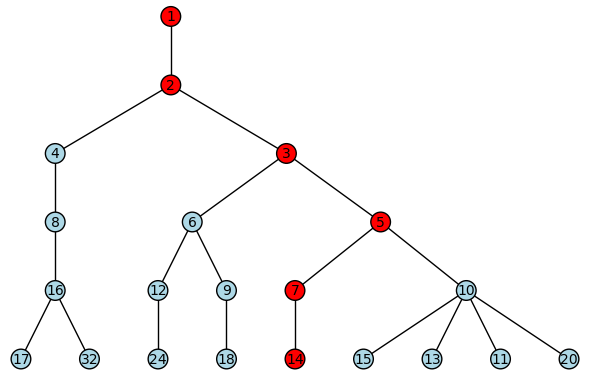

In [19]:
print_tree(build_tree(5), 14)

Для того, чтобы сравнить данный метод с методами, описанными выше, протестируем его для значений $n=3, 15, 16$
Построим сводную таблицу, в которой отразим кол-во операций при использовании каждого метода для всех значений $n$.

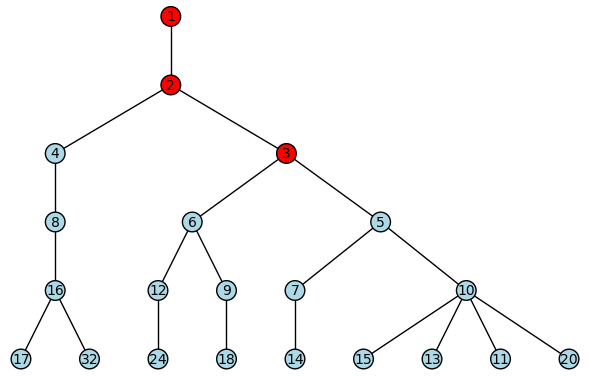

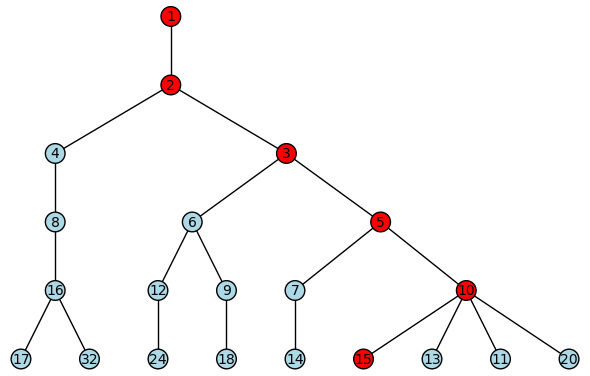

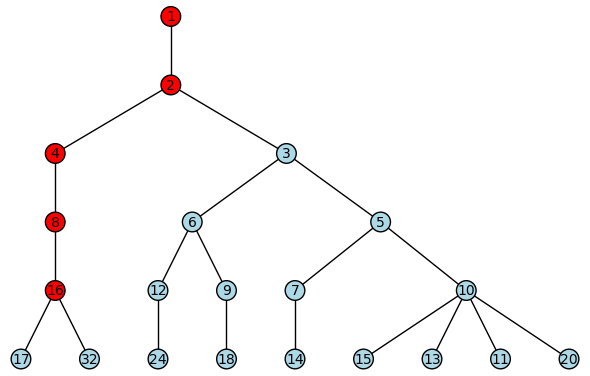

In [20]:
for elem in testing_set:
    print_tree(build_tree(5), elem)

Полученные результаты:
    
| Метод              | Количество операций<br>для 3 | Количество операций<br>для 15 | Количество операций<br>для 16 |
|--------------------|------------------------------|-------------------------------|-------------------------------|
| SX                 | 2                            | 6                             | 4                             |
| Справа<br>налево   | 3                            | 7                             | 5                             |
| Множителей         | 2                            | 5                             | 4                             |
| Дерево<br>степеней | 2                            | 5                             | 4                             |

### Выводы

Реализован метод дерева степеней, дерево выведено с помощью метода plot(), найдена цепочка операций для $n$, на которых были протестированы предыдущие методы.

В результате метод дерева степеней превосходит методы SX и возведения в степень справа налево и показывает такие же результаты, как и метод множителей

## Дерево обратных степеней

Внесем незначительные изменения в определения дерева степеней, чтобы узлы, расположенные ниже 𝑛 присоединялись в порядке убывания\
$n + a_{k−1}, \dots , n + a_2, n + a_1, n + 1$,\
а не возрастания
При этом внесем изменения в методы build_tree и print_tree.
Проверим количество операций для $n=3, 15, 16$

In [21]:
def build_inverse_tree(n):
    tree = {1:[1]}
    vertexes = [1]
    for level in range(n):
        next_level_vertexes = []
        for parent in vertexes:
            for leaf in tree[parent]:
                child = parent + leaf
                if child not in tree:
                    tree[child] = [child] + tree[parent]
                    next_level_vertexes.append(child)
        vertexes = next_level_vertexes
    return tree

def print_inverse_tree(tree, path = None):
    graph = {}
    copy_tree = tree.copy()
    tree.pop(1)
    for item, parent in tree.items():
        if not graph.get(parent[1]):
            graph[parent[1]] = [item]
        else:
            graph[parent[1]].append(item)
    new_graph = Graph(graph)
    if path:
        plt = new_graph.plot(layout='tree', tree_root = 1, by_component = True, vertex_color="lightblue", vertex_colors={'red': get_path(copy_tree, path)})
    else:
        plt = new_graph.plot(layout='tree', tree_root = 1, by_component = True, vertex_color="lightblue")
    plt.show()

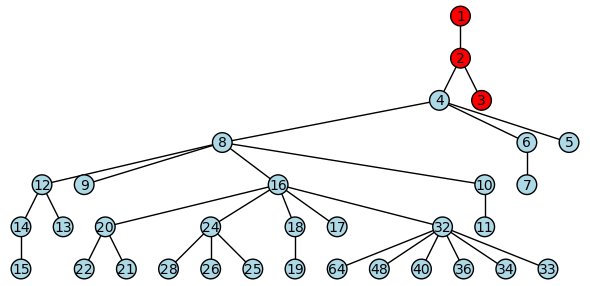

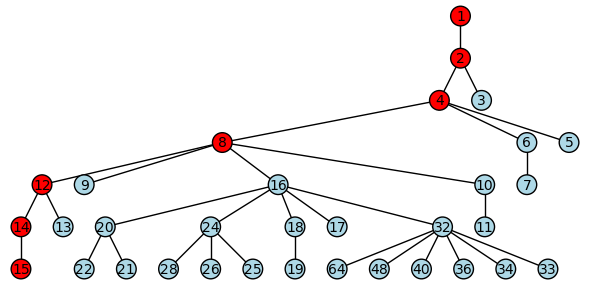

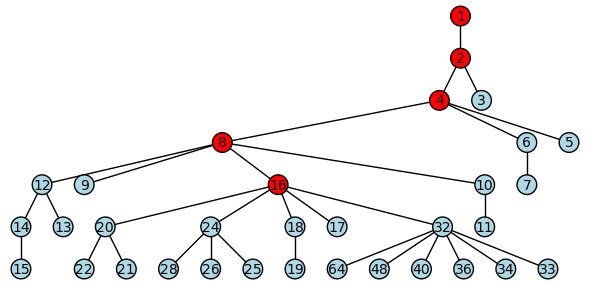

In [23]:
for elem in testing_set:
    print_inverse_tree(build_inverse_tree(6), elem)

Сравним полученные результаты с таблицей из предыдущего пункта. Нетрудно заметить, что число операций совпадает с числом операций для метода SX.

## Выводы

В результате выполнения данной работы были сформированы знания о работе алгоритмов быстрого вычисления мономов. Реализованы и проанализированы методы SX, возведения в степень справа налево, а так же метод "дерева степеней". Полученные функции были протестированы, результаты тестирования совпали с теоретическими оценками для данных методов. Кроме того был рассмотрен метод множителей. При совместном сравнении данных методов выяснено, что наименее эффективным является метод возведения в степень справа налево, т.к. затрачивает большее число операций, чем другие методы. Кроме того, если строить дерево убывающих степеней - оно будет соответствовать операциям для метода SX.